In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('crime_data.csv')

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.info()    # No null values present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df = df.rename(columns={'Unnamed: 0':'County'})

In [8]:
df['County'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
data = df.drop('County',axis=1)
scaled_data = scaler.fit_transform(data)

In [12]:
scaled_df = pd.DataFrame(data=scaled_data,columns=data.columns)

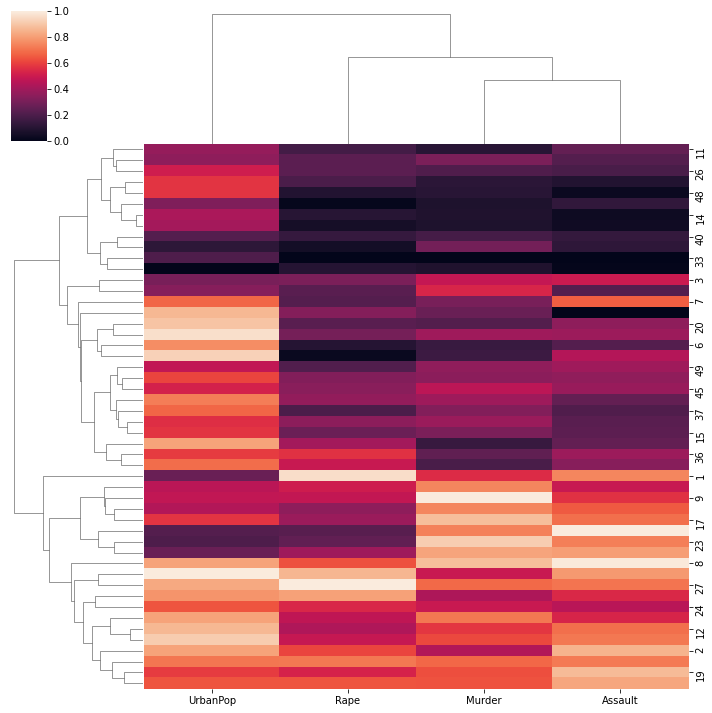

In [13]:
sns.clustermap(scaled_df)

## KMeans

#### Initial Model build & hyperparameter tuning

In [14]:
ssd = []
silhuoette = []
cal_har = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    label_pred = model.predict(scaled_df)
    ssc = silhouette_score(scaled_df,label_pred)
    chs = calinski_harabasz_score(scaled_df,label_pred)
    ssd.append(model.inertia_)
    silhuoette.append(ssc)
    cal_har.append(chs)

Text(0.5, 1.0, 'Elbow Method')

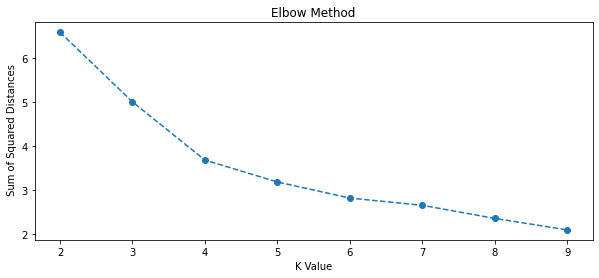

In [15]:
plt.figure(figsize=(10,4))
plt.plot(range(2,10), ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow Method")

# k=4 seems to be optimal value.

Text(0.5, 1.0, 'Silhuoette Score')

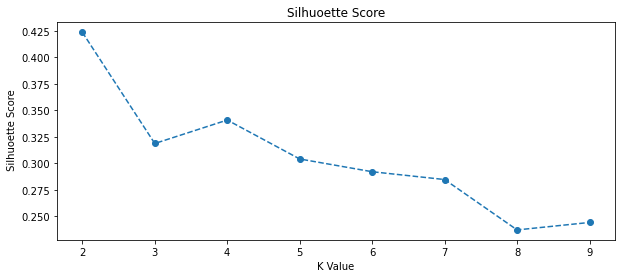

In [16]:
plt.figure(figsize=(10,4))
plt.plot(range(2,10), silhuoette,'o--')
plt.xlabel("K Value")
plt.ylabel(" Silhuoette Score")
plt.title("Silhuoette Score")

Text(0.5, 1.0, 'Calinski_Harabasz_score')

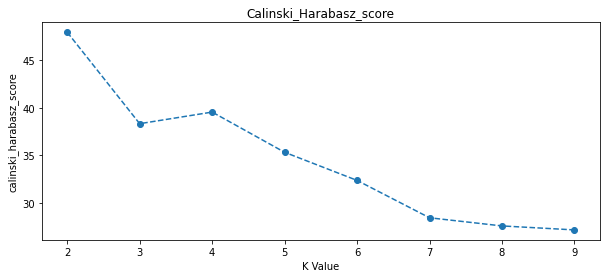

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(2,10), cal_har,'o--')
plt.xlabel("K Value")
plt.ylabel("calinski_harabasz_score")
plt.title("Calinski_Harabasz_score")

#### k=4 is optimal number of clusters refering to all the metric scores.

#### Final KMeans Model

In [18]:
model = KMeans(n_clusters=4)

In [19]:
model.fit(scaled_df)

KMeans(n_clusters=4)

In [20]:
df['Label_KMeans'] = pd.Series(model.labels_)
df

,County,Murder,Assault,UrbanPop,Rape,Label_KMeans
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [21]:
df1 = df.groupby(['Label_KMeans'],axis=0)['County'].apply(lambda x:tuple(x))

In [22]:
df1

Label_KMeans
0    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
1    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
2    (Alaska, Arizona, California, Colorado, Florid...
3    (Alabama, Arkansas, Georgia, Louisiana, Missis...
Name: County, dtype: object

In [23]:
df.groupby('Label_KMeans').mean()

,Murder,Assault,UrbanPop,Rape
Label_KMeans,,,,
0,5.852941,141.176471,73.647059,19.335294
1,3.600000,78.538462,52.076923,12.176923
2,10.966667,264.000000,76.500000,33.608333
3,13.937500,243.625000,53.750000,21.412500


##### We can say that county's belonging to cluster 2 has least crime rates compared to others, while counties in cluster 1 have highest murder cases. Counties belonging to cluster 3 have highest rape and assault cases.

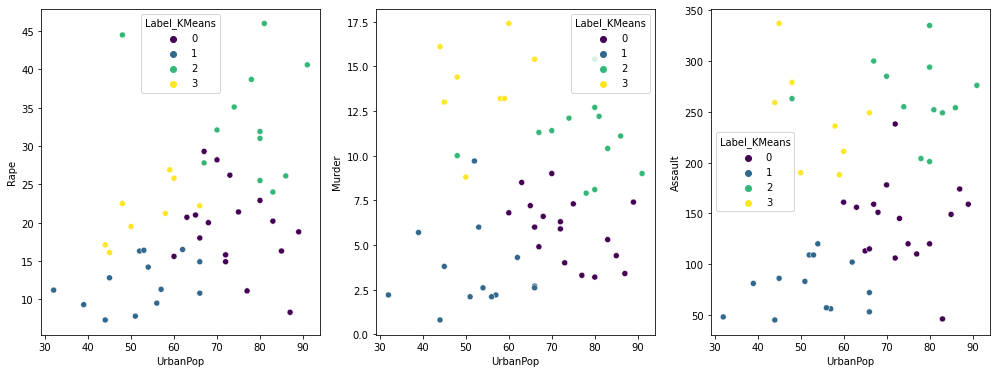

In [24]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(17,6))
sns.scatterplot(data=df,x='UrbanPop',y='Rape',hue='Label_KMeans',palette='viridis', ax=ax1)
sns.scatterplot(data=df,x='UrbanPop',y='Murder',hue='Label_KMeans',palette='viridis',ax=ax2)
sns.scatterplot(data=df,x='UrbanPop',y='Assault',hue='Label_KMeans',palette='viridis',ax=ax3)
plt.show()

## Hierarchical Clustering

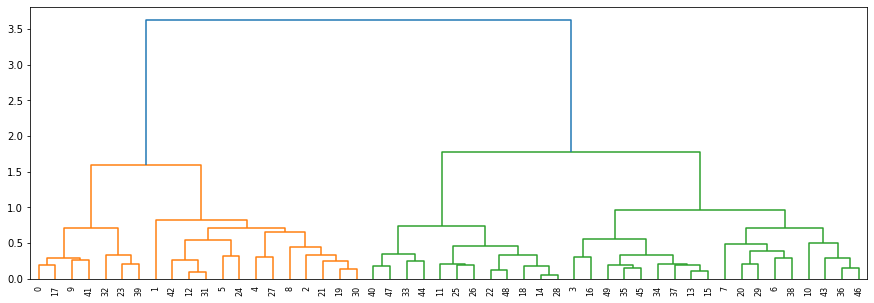

In [25]:
plt.figure(figsize=(15,5))
dendogram = hierarchy.dendrogram(hierarchy.linkage(scaled_df,method='ward'))

In [26]:
model_H = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean')

In [27]:
cluster_labels = model_H.fit_predict(scaled_df)

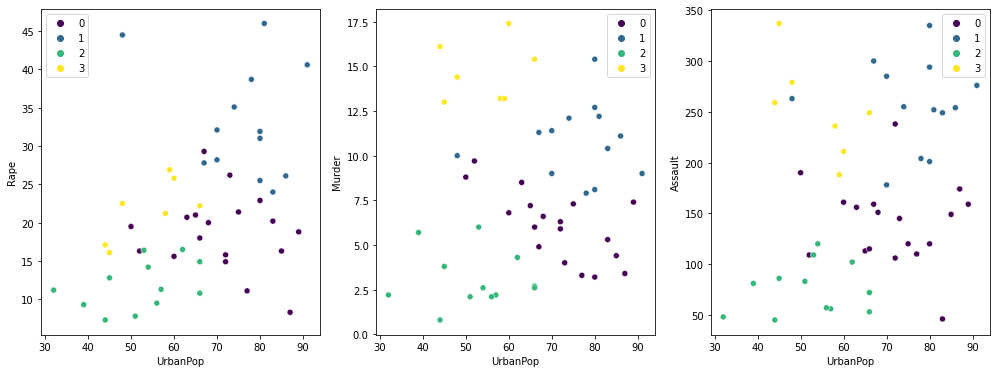

In [28]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(17,6))
sns.scatterplot(data=df,x='UrbanPop',y='Rape',hue=cluster_labels,palette='viridis', ax=ax1)
sns.scatterplot(data=df,x='UrbanPop',y='Murder',hue=cluster_labels,palette='viridis',ax=ax2)
sns.scatterplot(data=df,x='UrbanPop',y='Assault',hue=cluster_labels,palette='viridis',ax=ax3)
plt.show()

## DBSCAN 

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
per_outliers = []

for m in range(0,25):
    dbs = DBSCAN(min_samples=m)
    dbs.fit(scaled_df)
    outliers = 100 * np.sum(dbs.labels_ == -1) / len(dbs.labels_) 
    per_outliers.append(outliers)

Text(0.5, 0, 'Minimum Number of Samples')

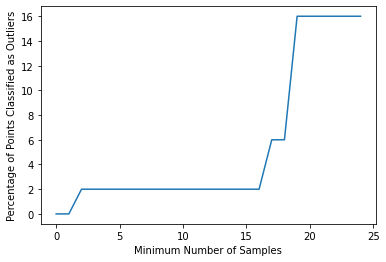

In [32]:
sns.lineplot(x=np.arange(0,25),y=per_outliers)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

#### min_samples=5 seems resonable looking at the graph.

In [33]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.01,1,25):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=5)
    dbscan.fit(scaled_df)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

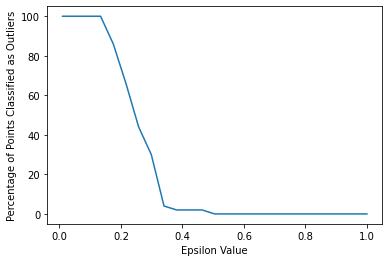

In [34]:
sns.lineplot(x=np.linspace(0.01,1,25),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

### Final model 

In [35]:
dbs = DBSCAN(eps=0.3,min_samples=5)

In [36]:
label_DBS = dbs.fit_predict(scaled_df)

In [37]:
label_DBS

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

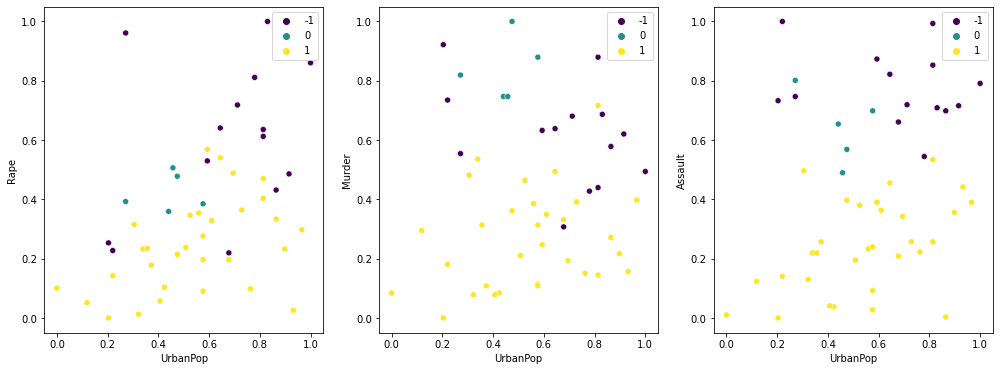

In [40]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(17,6))
sns.scatterplot(data=scaled_df,x='UrbanPop',y='Rape',hue=label_DBS,palette='viridis', ax=ax1)
sns.scatterplot(data=scaled_df,x='UrbanPop',y='Murder',hue=label_DBS,palette='viridis',ax=ax2)
sns.scatterplot(data=scaled_df,x='UrbanPop',y='Assault',hue=label_DBS,palette='viridis',ax=ax3)
plt.show()